# **Chapter 8. Gradient Descent**

Import the necessary libraries for the textbook code.

In [ ]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import 
with open('linear_algebra.py', 'w') as f:
    f.write(r.text)

# now we can import
from linear_algebra import Vector, dot
from linear_algebra import vector_mean
from linear_algebra import distance, add, scalar_multiply

* Frequently when doing data science, we'll be trying to the find the best model for a certain situation.
* This means we'll need to solve a number of **optimization** problems.
* Our approach will be a technique called **gradient descent**, which lends itself pretty well to a from-scratch treatment.

## The Idea Behind Gradient Descent

* We need to find the input *v* that produces the largest (or smallest) possible value.
* For functions like ours, the gradient gives the input direction in which the function most quickly increases.
* Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point.
* Similarly, you can try to minimize a function by taking small steps in the opposite direction.

![picture](https://drive.google.com/uc?id=1Vg7C8h_mDkX0AJ56GqTfTB9bCIFa7VV8)

In [ ]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

## Estimating the Gradient

* If *f* is a function of one variable, its derivative at a point *x* measures how *f(x)* changes when we make a very small change to *x*.
* The derivative is the slope of the tangent line at *(x, f(x))*, while the difference quotient is the slope of the not-quite-tangent line that runs through *(x + h, f(x + h))*. As *h* gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line.

![picture](https://drive.google.com/uc?id=1hPExtC96vQJq13QNhtrEHzCf2XvrheRZ)

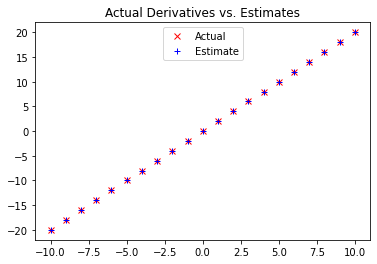

In [ ]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # red x
plt.plot(xs, estimates, 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()
plt.close()

* When *f* is a function of many variables, it has multiple partial derivatives, each indicating how *f* changes when we make small changes in just one of the input variables.
* We calculate its *i*-th partial derivative by treating it as a function of just its *i*-th variable, holding the other variables fixed.

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""

    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
        for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

## Using the Gradient



In [ ]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute the gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should be close to 0

0 [2.0167311334336007, -7.145145922350005, 6.729305120841887]
1 [1.9763965107649286, -7.002243003903004, 6.5947190184250495]
2 [1.93686858054963, -6.862198143824944, 6.462824638056548]
3 [1.8981312089386373, -6.724954180948445, 6.333568145295417]
4 [1.8601685847598646, -6.590455097329476, 6.206896782389509]
5 [1.8229652130646672, -6.458645995382887, 6.082758846741719]
6 [1.786505908803374, -6.329473075475229, 5.961103669806884]
7 [1.7507757906273065, -6.202883613965724, 5.8418815964107464]
8 [1.7157602748147605, -6.07882594168641, 5.7250439644825315]
9 [1.6814450693184653, -5.957249422852682, 5.610543085192881]
10 [1.647816167932096, -5.838104434395628, 5.498332223489023]
11 [1.614859844573454, -5.721342345707716, 5.388365579019243]
12 [1.582562647681985, -5.606915498793561, 5.280598267438858]
13 [1.5509113947283453, -5.4947771888176895, 5.174986302090081]
14 [1.5198931668337783, -5.384881645041336, 5.071486576048279]
15 [1.4894953034971028, -5.277184012140509, 4.9700568445273134]
16 [

## Choosing the Right Step Size

* Choosing the right step size is more of an art than a science.
>* Using a fixed step size
>* Gradually shrinking the step size over time 
>* At each step, choosing the step size that minimizes the value of the objective function

## Using Gradient Descent to Fit Models

* We'll be using gradient descent to fit parameterized models to data. In
the usual case, we'll have some dataset and some (hypothesized) model for the data that depends (in a differentiable way) on one or more parameters.
* We'll also have a **loss** function that measures how well the model fits our data. (Smaller is better.)

* The parameters and loss function:
>* theta = [slope, intercept]
>* loss = *mean squared error*

* Here's what we're going to do:
>1. Start with a random value for theta.
>2. Compute the mean of the gradients.
>3. Adjust theta in that direction.
>4. Repeat.

* After a lot of **epochs** (what we call each pass through the dataset), we should learn something like the correct parameters:

In [ ]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

Streaming output truncated to the last 5000 lines.
0 [32.842937780645315, 0.4870352429889263]
1 [11.429247535552559, 0.5089041102835938]
2 [25.712200797896728, 0.5093155495985793]
3 [16.185471383352475, 0.5240091192972788]
4 [22.5398145964232, 0.5291465724420367]
5 [18.30147281075817, 0.5406280938935758]
6 [21.128458263318194, 0.5478483105165468]
7 [19.242866186677283, 0.5578810721588319]
8 [20.50056613455841, 0.5660081762011915]
9 [19.661688396425742, 0.5753767259833475]
10 [20.221229216310014, 0.5838876609278066]
11 [19.848024000382146, 0.5929411148222611]
12 [20.09696093285993, 0.6016032565929987]
13 [19.93092866103902, 0.6104970110126727]
14 [20.041681080097987, 0.6192069456516864]
15 [19.967817926520294, 0.628010212840481]
16 [20.017093453223804, 0.6367220103413203]
17 [19.984235388710065, 0.6454656597738614]
18 [20.00616046139016, 0.6541589638430237]
19 [19.991545131216608, 0.662856806376728]
20 [20.001302254284898, 0.6715226378951912]
21 [19.99480291902987, 0.6801808948736856]
2

## Minibatch and Stochastic Gradient Descent

* One drawback of the preceding approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters.
* In this case it was fine, because our dataset was only 100 pairs and the gradient computation was cheap.
* Your models, however, will frequently have large datasets and expensive gradient computations. In that case you’ll want to take gradient steps more often.
* We can do this using a technique called **minibatch gradient descent**, in which we compute the gradient (and take a gradient step) based on a "**minibatch**" sampled from the larger dataset:

In [ ]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

* Now we can solve our problem again using minibatches:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"   

0 [19.568082653581552, 0.024174343796898368]
1 [20.10504618879619, 0.09323122661145312]
2 [20.992215770575065, 0.14178223216117547]
3 [19.89666877893517, 0.42272976786483263]
4 [20.274044618891, 0.46133743999403226]
5 [19.832720136871135, 0.4682031390135275]
6 [20.044984535589013, 0.49526253219005933]
7 [20.085529701133993, 0.5238790982953839]
8 [19.95150418520396, 0.5408991902165857]
9 [20.00033377386531, 0.5691172876988367]
10 [20.12333629911663, 0.6060241257392813]
11 [19.844078669912772, 0.6902685851940116]
12 [20.051252357955654, 0.7154464969899769]
13 [19.823121732744216, 0.9092240602078521]
14 [19.82390781072097, 1.0847992794989298]
15 [20.126296863722384, 1.1137794513605455]
16 [20.054433960657683, 1.1377707852584618]
17 [20.15220315487987, 1.1676521688178536]
18 [20.131566794332436, 1.3421624930954812]
19 [20.241196269596543, 1.3682315207802465]
20 [19.872806878767722, 1.3632706709770757]
21 [19.777135425525493, 1.372357830031209]
22 [20.029265169947667, 1.400284945868734]
23 

* Another variation is **stochastic gradient descent**, in which you take gradient steps based on one training example at a time:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.107872595664848, -0.3690470744880375]
1 [20.103243804777655, -0.1386947391265826]
2 [20.098814271227567, 0.08177460178800851]
3 [20.09457474006233, 0.2927849780615018]
4 [20.09051713057738, 0.4947422147249085]
5 [20.086633625037944, 0.6880347264807103]
6 [20.082916702869948, 0.8730342622444882]
7 [20.07935929229595, 1.0500966220952677]
8 [20.075954468920603, 1.219562340731957]
9 [20.072695740082825, 1.381757342190698]
10 [20.06957681707155, 1.5369935677725477]
11 [20.066591713441536, 1.6855695751482236]
12 [20.063734653185023, 1.827771112270921]
13 [20.06100022894478, 1.9638716685452156]
14 [20.05838306348198, 2.0941329988886976]
15 [20.055878201623404, 2.2188056273142758]
16 [20.053480830585283, 2.338129330994329]
17 [20.051186297775093, 2.4523335989747586]
18 [20.048990222403933, 2.561638074245706]
19 [20.046888353706688, 2.666252976314928]
20 [20.044876658437033, 2.766379505181839]
21 [20.042951305721726, 2.862210229554038]
22 [20.041108518461517, 2.95392945539192]
23 [20.0393

* On this problem, stochastic gradient descent finds the optimal parameters in a much smaller number of epochs. But there are always tradeoffs. The gradient for a single point might lie in a very different direction from the gradient for the dataset as a whole.

![picture](https://drive.google.com/uc?id=1r6qcHH5frF2lxEjaTuv3sA_DJzomNUYU)